# Uczenie ze wzmocnieniem

In [1]:
! pip install gym==0.26.2

     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
     ------------------------------------- 721.7/721.7 kB 14.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827740 sha256=b5d36fae16896e8bb983256a52b5e6d2c23023ba40dbaf2295c7a21bd95684c4
  Stored in directory: c:\users\jj\appdata\local\pip\cache\wheels\b9\22\6d\3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym

   -------------------------- ------------- 2/3 [gym]
   -------------------------- ------------- 2/3 [gym]
   -------------------------- ------------- 2/3 [gym]
   ---------------------------------------- 3/3 [gym]



    numpy (>=1.19.*) ; python_version >= "3.7"
           ~~~~~~~^


In [1]:
import gym
import time

env = gym.make("CartPole-v1", render_mode="human")
obs, info = env.reset()

start = time.time()
steps = 0
episodes = 0

while steps < 2000:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    time.sleep(0.02)  # umożliwia płynne renderowanie na Windowsie
    steps += 1

    if done:
        obs, info = env.reset()
        episodes += 1

end = time.time()
print("FPS:", steps / (end - start))
print("Epizodów:", episodes)


c:\Users\JJ\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


FPS: 43.72143175309447
Epizodów: 93


## Implementacja Q-learningu na FrozenLake-v1

In [37]:
import numpy as np
import gym

env = gym.make("FrozenLake-v1", is_slippery=False)
n_states = env.observation_space.n
n_actions = env.action_space.n

Q = np.zeros((n_states, n_actions))

epsilon = 0.2    # mniej losowych akcji
alpha = 0.8      # szybciej się uczy
gamma = 0.95
episodes = 10000  # więcej epizodów

rewards = []

for episode in range(episodes):
    state, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )
        state = next_state
        total_reward += reward

    rewards.append(total_reward)

print("Liczba wygranych epizodów:", sum(rewards))
print("Q-table po nauce:")
print(Q)

Liczba wygranych epizodów: 2298.0
Q-table po nauce:
[[0.73509189 0.77378094 0.6983373  0.73509189]
 [0.73509189 0.         0.66339265 0.69833721]
 [0.69833722 0.6859     0.         0.53056651]
 [0.53073607 0.         0.         0.        ]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.65794269]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]


## Ewaluacja

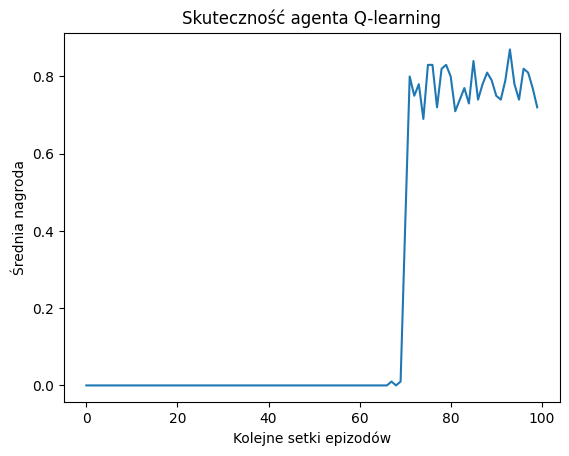

In [38]:
import matplotlib.pyplot as plt

avg_rewards = [np.mean(rewards[i:i+100]) for i in range(0, episodes, 100)]
plt.plot(avg_rewards)
plt.xlabel("Kolejne setki epizodów")
plt.ylabel("Średnia nagroda")
plt.title("Skuteczność agenta Q-learning")
plt.show()

## Frozen Lake - v1

In [40]:
import gym

env = gym.make("FrozenLake-v1", is_slippery=False)
state, info = env.reset()

done = False
while not done:
    print("Stan:", state)

    action = env.action_space.sample()  # losowa akcja (0=lewo, 1=dół, 2=prawo, 3=góra)
    next_state, reward, terminated, truncated, info = env.step(action)

    print(" -> akcja:", action)
    print(" -> nowy stan:", next_state)
    print(" -> nagroda:", reward)
    print(" -> koniec?", terminated or truncated)
    print("-" * 20)

    done = terminated or truncated
    state = next_state


Stan: 0
 -> akcja: 1
 -> nowy stan: 4
 -> nagroda: 0.0
 -> koniec? False
--------------------
Stan: 4
 -> akcja: 1
 -> nowy stan: 8
 -> nagroda: 0.0
 -> koniec? False
--------------------
Stan: 8
 -> akcja: 1
 -> nowy stan: 12
 -> nagroda: 0.0
 -> koniec? True
--------------------


## Taxi - v3

In [49]:
import gym

env = gym.make("Taxi-v3", render_mode="ansi")  # render tekstowy

state, info = env.reset()
done = False

while not done:
    print(env.render())  # pokaż planszę w terminalu

    action = env.action_space.sample()  # losowa akcja
    next_state, reward, terminated, truncated, info = env.step(action)

    print("Akcja:", action)
    print("Nagroda:", reward)
    print("-" * 20)

    done = terminated or truncated
    state = next_state


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Akcja: 5
Nagroda: -10
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Akcja: 4
Nagroda: -10
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Akcja: 3
Nagroda: -1
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Akcja: 1
Nagroda: -1
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Akcja: 2
Nagroda: -1
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Akcja: 5
Nagroda: -10
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Akcja: 1
Nagroda: -1
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : 

# CartPole - v1

In [51]:
import gym
import time

env = gym.make("CartPole-v1", render_mode="human")
obs, info = env.reset()

for _ in range(2000):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    print("Obs:", obs)
    print("Akcja:", action)
    print("Nagroda:", reward)
    print("Terminated:", terminated, "Truncated:", truncated)
    print("-" * 20)

    time.sleep(0.02)
    if done:
        obs, info = env.reset()

Obs: [ 0.01902723 -0.17564394 -0.02726617  0.31068364]
Akcja: 0
Nagroda: 1.0
Terminated: False Truncated: False
--------------------
Obs: [ 0.01551435 -0.37036702 -0.0210525   0.5946444 ]
Akcja: 0
Nagroda: 1.0
Terminated: False Truncated: False
--------------------
Obs: [ 0.00810701 -0.17495683 -0.00915961  0.29540512]
Akcja: 1
Nagroda: 1.0
Terminated: False Truncated: False
--------------------
Obs: [ 0.00460787  0.0202945  -0.00325151 -0.00015247]
Akcja: 1
Nagroda: 1.0
Terminated: False Truncated: False
--------------------
Obs: [ 0.00501376 -0.17478067 -0.00325455  0.2915028 ]
Akcja: 0
Nagroda: 1.0
Terminated: False Truncated: False
--------------------
Obs: [ 0.00151815 -0.36985606  0.0025755   0.5831575 ]
Akcja: 0
Nagroda: 1.0
Terminated: False Truncated: False
--------------------
Obs: [-0.00587898 -0.565014    0.01423865  0.87665063]
Akcja: 0
Nagroda: 1.0
Terminated: False Truncated: False
--------------------
Obs: [-0.01717926 -0.37008846  0.03177166  0.58847797]
Akcja: 1
Nagro

## Jak tworzyć własne środowisko?

In [60]:
# Przykład minimalnego środowiska:

import gym
from gym import spaces
import numpy as np

class MyEnv(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(5)
        self.action_space = spaces.Discrete(2)
        self.state = 0

    def reset(self, seed=None, options=None):
        self.state = 0
        return self.state, {}

    def step(self, action):
        self.state = (self.state + 1) % 5
        reward = 1 if self.state == 0 else 0
        terminated = self.state == 0
        return self.state, reward, terminated, False, {}

    def render(self):
        print(f"Stan: {self.state}")



In [ ]:
# Aby użyć środowiska, można je zarejestrować:

from gym.envs.registration import register

register(
    id="MyEnv-v1",
    entry_point="__main__:MyEnv",
)

env = gym.make("MyEnv-v1")

In [62]:
env = gym.make("MyEnv-v1")

state, info = env.reset()
done = False

while not done:
    env.render()
    action = env.action_space.sample()  # losowa akcja (tu nie ma znaczenia jaka)
    next_state, reward, terminated, truncated, info = env.step(action)
    print(f"Akcja: {action}, Nowy stan: {next_state}, Nagroda: {reward}, Koniec: {terminated}")
    done = terminated or truncated
    state = next_state

Stan: 0
Akcja: 1, Nowy stan: 1, Nagroda: 0, Koniec: False
Stan: 1
Akcja: 0, Nowy stan: 2, Nagroda: 0, Koniec: False
Stan: 2
Akcja: 1, Nowy stan: 3, Nagroda: 0, Koniec: False
Stan: 3
Akcja: 0, Nowy stan: 4, Nagroda: 0, Koniec: False
Stan: 4
Akcja: 0, Nowy stan: 0, Nagroda: 1, Koniec: True
